In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['titanic', 'forest-cover-type-kernels-only']


In [2]:
from pyspark import SparkContext
sc = SparkContext()
from pyspark.sql import SparkSession
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.regression import LinearRegressionWithSGD as lrSGD

In [3]:
spark = SparkSession \
   .builder \
   .appName("Titanic PySpark Exercise") \
   .config("spark.some.config.option", "some-value") \
   .getOrCreate()

## Learning Objectives

- Learn all of the methods in pandas for data-frame manipulation
- The dataset we use is Titanic dataset
- Apply visualization to data-frame

### Lets make Pandas dataframe from titanic csv file 

In [4]:
df = spark.read.csv('../input/titanic/train.csv', header = True)

### Lets look at the first 5 rows of dataframe

In [5]:
df.show(5)

+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male| 22|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female| 38|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female| 26|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female| 35|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male| 35|    0|    0|          373450|   8.05| null|       S|
+-----------+--------+------+--------------------+------+---+-----+-----+---------------

In [6]:
df.count(), len(df.columns)

(891, 12)

### Titanic Dataset Description

In [7]:
# VARIABLE DESCRIPTIONS:
# survival        Survival
#                 (0 = No; 1 = Yes)
# pclass          Passenger Class
#                 (1 = 1st; 2 = 2nd; 3 = 3rd)
# name            Name
# sex             Sex
# age             Age
# sibsp           Number of Siblings/Spouses Aboard
# parch           Number of Parents/Children Aboard
# ticket          Ticket Number
# fare            Passenger Fare
# cabin           Cabin
# embarked        Port of Embarkation
#                 (C = Cherbourg; Q = Queenstown; S = Southampton)

KeyboardInterrupt: 

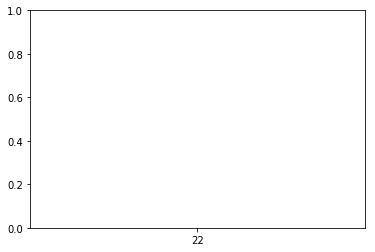

In [8]:
# TODO

# import matplotlib.pyplot as plt

# df_pandas = df.toPandas() 

# df_pandas['Age'].hist(bins=16)
# plt.show()

### How many of Age values are empty (or null)?

In [9]:
from pyspark.sql.functions import isnan, when, count, col

df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()


+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|          0|       0|     0|   0|  0|177|    0|    0|     0|   0|  687|       2|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+



### Create a new column as gender, when Sex is female it is zero when sex is male it is one


In [21]:
df2 = df.withColumn("Gender", when(df['Sex'] == "female", 0).otherwise(1))
df2.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Gender|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|  22|    1|    0|       A/5 21171|   7.25| null|       S|     1|
|          2|       1|     1|Cumings, Mrs. Joh...|female|  38|    1|    0|        PC 17599|71.2833|  C85|       C|     0|
|          3|       1|     3|Heikkinen, Miss. ...|female|  26|    0|    0|STON/O2. 3101282|  7.925| null|       S|     0|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|  35|    1|    0|          113803|   53.1| C123|       S|     0|
|          5|       0|     3|Allen, Mr. Willia...|  male|  35|    0|    0|          373450|   8.05| null|       S|     1|
|          6|       0|  

In [ ]:
spark = SparkSession.Builder().getOrCreate()

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import StringIndexer
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

In [ ]:
train = spark.read.csv('../input/train.csv',header = True,inferSchema=True)
test = spark.read.csv('../input/test.csv',header = True,inferSchema=True)

In [ ]:
train.limit(5).toPandas()

In [ ]:
test.count()

In [ ]:
train_mod = train.withColumn("HF1", train.Horizontal_Distance_To_Hydrology + train.Horizontal_Distance_To_Fire_Points) \
.withColumn("HF2", abs(train.Horizontal_Distance_To_Hydrology - train.Horizontal_Distance_To_Fire_Points)) \
.withColumn("HR1", abs(train.Horizontal_Distance_To_Hydrology + train.Horizontal_Distance_To_Roadways)) \
.withColumn("HR2", abs(train.Horizontal_Distance_To_Hydrology - train.Horizontal_Distance_To_Roadways)) \
.withColumn("FR1", abs(train.Horizontal_Distance_To_Fire_Points + train.Horizontal_Distance_To_Roadways)) \
.withColumn("FR2", abs(train.Horizontal_Distance_To_Fire_Points - train.Horizontal_Distance_To_Roadways)) \
.withColumn("ele_vert", train.Elevation - train.Vertical_Distance_To_Hydrology) \
.withColumn("slope_hyd", pow((pow(train.Horizontal_Distance_To_Hydrology,2) + pow(train.Vertical_Distance_To_Hydrology,2)),0.5)) \
.withColumn("Mean_Amenities", (train.Horizontal_Distance_To_Fire_Points + train.Horizontal_Distance_To_Hydrology + train.Horizontal_Distance_To_Roadways)/3) \
.withColumn("Mean_Fire_Hyd", (train.Horizontal_Distance_To_Fire_Points + train.Horizontal_Distance_To_Hydrology)/2)

test_mod = test.withColumn("HF1", test.Horizontal_Distance_To_Hydrology + test.Horizontal_Distance_To_Fire_Points) \
.withColumn("HF2", abs(test.Horizontal_Distance_To_Hydrology - test.Horizontal_Distance_To_Fire_Points)) \
.withColumn("HR1", abs(test.Horizontal_Distance_To_Hydrology + test.Horizontal_Distance_To_Roadways)) \
.withColumn("HR2", abs(test.Horizontal_Distance_To_Hydrology - test.Horizontal_Distance_To_Roadways)) \
.withColumn("FR1", abs(test.Horizontal_Distance_To_Fire_Points + test.Horizontal_Distance_To_Roadways)) \
.withColumn("FR2", abs(test.Horizontal_Distance_To_Fire_Points - test.Horizontal_Distance_To_Roadways)) \
.withColumn("ele_vert", test.Elevation - test.Vertical_Distance_To_Hydrology) \
.withColumn("slope_hyd", pow((pow(test.Horizontal_Distance_To_Hydrology,2) + pow(test.Vertical_Distance_To_Hydrology,2)),0.5)) \
.withColumn("Mean_Amenities", (test.Horizontal_Distance_To_Fire_Points + test.Horizontal_Distance_To_Hydrology + test.Horizontal_Distance_To_Roadways)/3) \
.withColumn("Mean_Fire_Hyd", (test.Horizontal_Distance_To_Fire_Points + test.Horizontal_Distance_To_Hydrology)/2)

In [ ]:
train_mod.limit(2).toPandas()

In [ ]:
test_mod.limit(2).toPandas()

In [ ]:
test_mod.count()

In [ ]:
train_columns = test_mod.columns[1:]

In [ ]:
train_mod.printSchema

In [ ]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler()\
.setInputCols(train_columns)\
.setOutputCol("features")
train_mod01 = assembler.transform(train_mod)

In [ ]:
train_mod01.limit(2).toPandas()

In [ ]:
train_mod02 = train_mod01.select("features","Cover_Type")

In [ ]:
test_mod01 = assembler.transform(test_mod)
test_mod02 = test_mod01.select("Id","features")

In [ ]:
from pyspark.ml.classification import RandomForestClassifier, RandomForestClassificationModel
rfClassifer = RandomForestClassifier(labelCol = "Cover_Type", numTrees = 100)

In [ ]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = [rfClassifer])

In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
paramGrid = ParamGridBuilder()\
   .addGrid(rfClassifer.maxDepth, [1, 2, 4, 5, 6, 7, 8])\
   .addGrid(rfClassifer.minInstancesPerNode, [1, 2, 4, 5, 6, 7, 8])\
   .build()

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol = "Cover_Type", predictionCol = "prediction", metricName = "accuracy") 

crossval = CrossValidator(estimator = pipeline,
                          estimatorParamMaps = paramGrid,
                          evaluator = evaluator,
                          numFolds = 10)

In [ ]:
cvModel = crossval.fit(train_mod02)

In [ ]:
cvModel.avgMetrics

In [ ]:
cvModel.bestModel.stages

In [ ]:
prediction = cvModel.transform(test_mod02)

In [ ]:
selected = prediction.select("Id","features", "probability", "prediction")

In [ ]:
selected.limit(5).toPandas()

In [ ]:
sub_final = selected.select(col("Id"),col("prediction").cast(IntegerType()).alias("Cover_Type"))

In [ ]:
sub_final.limit(2).toPandas()

In [ ]:
sub_final.toPandas().to_csv('submission.csv',index=False)